# U.S. oil and gas Production analysis

Analysing the [Kaggle Dataset](https://www.kaggle.com/djzurawski/us-oil-and-gas-production-june-2008-to-june-2018) with information about Oil and Gas production in the US from June 2008 to June 2018.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib

---

Let's load the Gas production:

In [19]:
file = "data/U.S._natural_gas_production.csv"
gas_df = pd.read_csv(file, decimal=",")
gas_df.head(3)

,Month,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
0,2008-06-01,70626,8875,1196,1024,2995,7339,6839,670,1198,540,21446,5241,224,243,3975,323,3989,3576,932
1,2008-07-01,71137,8375,1256,1034,3150,7468,6940,674,1200,512,21547,5256,220,243,4179,324,4008,3834,919
2,2008-08-01,70760,8739,1313,1033,3092,6868,6835,678,1277,529,21777,4896,220,249,4092,327,3896,4056,881


In [20]:
gas_df.shape

(121, 20)

In [21]:
gas_df.columns

Index(['Month', 'U.S.', 'Alaska', 'Arkansas', 'Kansas', 'Other States',
       'Federal Offshore--Gulf of Mexico', 'Wyoming', 'West Virginia', 'Utah',
       'Pennsylvania', 'Texas', 'Oklahoma', 'Ohio', 'North Dakota',
       'New Mexico', 'Montana', 'Louisiana', 'Colorado', 'California'],
      dtype='object')

In [22]:
gas_df.dtypes[0:2]

Month    object
U.S.      int64
dtype: object

In [25]:
gas_df['Month'] = pd.to_datetime(gas_df['Month'], format='%Y-%m-%d')
gas_df['Month'].head(3)

0   2008-06-01
1   2008-07-01
2   2008-08-01
Name: Month, dtype: datetime64[ns]

In [26]:
gas_df.dtypes[0:2]

Month    datetime64[ns]
U.S.              int64
dtype: object

In [27]:
gas_df['Month'].dt.year.head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Month, dtype: int64

In [28]:
gas_df['Month'].dt.month.tail()

116    2
117    3
118    4
119    5
120    6
Name: Month, dtype: int64

In [29]:
month_type = gas_df['Month'].dtype

---

## Yearly Gas production

In [35]:
yearly_gas_df = gas_df.groupby(gas_df['Month'].dt.year).sum()
yearly_gas_df

,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
Month,,,,,,,,,,,,,,,,,,,
2008,489473,64732,9395,7229,21678,39112,48393,4709,8726,3759,151483,36206,1617,1773,28518,2262,26289,27351,6240
2009,856876,108986,22353,11689,36078,80346,83413,8692,14782,9009,251694,62535,2919,3040,46867,3463,51221,49716,10071
2010,881622,105219,30475,10708,37542,74309,82687,8718,14361,18771,249632,60074,2568,3741,44101,3068,72873,52259,10521
2011,936163,104154,35384,10191,38187,60213,78095,12948,15170,43014,260747,62075,2592,5155,42315,2615,99905,54215,9181
2012,968632,103856,37571,9714,37045,50102,72988,17694,16079,73950,266989,66337,2772,8473,41846,2197,96895,56037,8092
2013,970617,105776,37466,9613,22657,43647,67338,24363,15482,107076,272844,65524,5442,11362,41010,2078,77873,52769,8296
2014,1032439,104298,36917,9415,20761,41937,65709,35055,14946,139932,284598,76643,16803,15214,41631,1947,64746,54021,7861
2015,1082158,104447,33221,9349,20102,42979,65615,43236,13717,158236,289330,82166,33069,19211,42638,1916,59621,55521,7786
2016,1070085,105900,26999,7984,18722,39990,60613,45077,11958,174225,266713,80932,47199,19964,42120,1710,57459,55791,6723


Text(0.5, 0, 'Year')

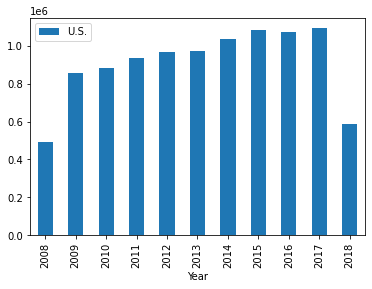

In [46]:
plot = yearly_gas_df.filter(['U.S.']).plot(kind="bar")
plot.set_xlabel("Year")

In [51]:
full_year_mask = np.logical_and(yearly_gas_df.index >= 2009, yearly_gas_df.index <= 2017)

In [52]:
filtered_yearly_gas_df = yearly_gas_df[full_year_mask]

In [53]:
filtered_yearly_gas_df

,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
Month,,,,,,,,,,,,,,,,,,,
2009,856876,108986,22353,11689,36078,80346,83413,8692,14782,9009,251694,62535,2919,3040,46867,3463,51221,49716,10071
2010,881622,105219,30475,10708,37542,74309,82687,8718,14361,18771,249632,60074,2568,3741,44101,3068,72873,52259,10521
2011,936163,104154,35384,10191,38187,60213,78095,12948,15170,43014,260747,62075,2592,5155,42315,2615,99905,54215,9181
2012,968632,103856,37571,9714,37045,50102,72988,17694,16079,73950,266989,66337,2772,8473,41846,2197,96895,56037,8092
2013,970617,105776,37466,9613,22657,43647,67338,24363,15482,107076,272844,65524,5442,11362,41010,2078,77873,52769,8296
2014,1032439,104298,36917,9415,20761,41937,65709,35055,14946,139932,284598,76643,16803,15214,41631,1947,64746,54021,7861
2015,1082158,104447,33221,9349,20102,42979,65615,43236,13717,158236,289330,82166,33069,19211,42638,1916,59621,55521,7786
2016,1070085,105900,26999,7984,18722,39990,60613,45077,11958,174225,266713,80932,47199,19964,42120,1710,57459,55791,6723
2017,1090730,106969,23050,7247,17069,35592,56410,52609,10312,179644,260314,82616,58702,22577,43910,1577,69947,55546,6642


Text(0.5, 0, 'Year')

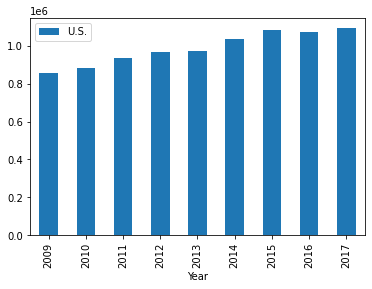

In [54]:
plot2 = filtered_yearly_gas_df.filter(['U.S.']).plot(kind="bar")
plot2.set_xlabel("Year")

### State production

Let's have a look at the yearly production of some specific states

In [55]:
filtered_yearly_gas_df.columns[1:].sort_values()

Index(['Alaska', 'Arkansas', 'California', 'Colorado',
       'Federal Offshore--Gulf of Mexico', 'Kansas', 'Louisiana', 'Montana',
       'New Mexico', 'North Dakota', 'Ohio', 'Oklahoma', 'Other States',
       'Pennsylvania', 'Texas', 'Utah', 'West Virginia', 'Wyoming'],
      dtype='object')

Text(0.5, 0, 'Year')

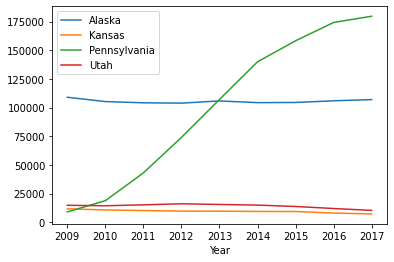

In [59]:
filtered_yearly_gas_df.filter(['Alaska', 'Kansas', 'Pennsylvania', 'Utah']).plot().set_xlabel("Year")

### Check your code

In [60]:
from nbresult import ChallengeResult

result = ChallengeResult('gas',
    month_type=month_type,
    yearly_gas=filtered_yearly_gas_df.shape
)
result.write()

In [61]:
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.6, pytest-6.2.3, py-1.10.0, pluggy-0.13.1 -- /Users/smrack/.pyenv/versions/3.8.6/envs/lewagon/bin/python3.8
cachedir: .pytest_cache
rootdir: /Users/smrack/code/olushO/data-challenges/02-Data-Toolkit/01-Data-Analysis/02-US-Oil-and-Gas-Production
plugins: anyio-2.2.0, dash-1.20.0
collecting ... collected 2 items

tests/test_gas.py::TestGas::test_month_column_is_a_datetime PASSED       [ 50%]
tests/test_gas.py::TestGas::test_yearly_gas_production_df_has_the_right_shape PASSED [100%]

============================== 2 passed in 0.30s ===============================


💯 You can commit your code:

git add tests/gas.pickle

git commit -m 'Completed gas step'

git push origin master


---

## Comparing with Crude Oil Production

In [63]:
!pwd

/Users/smrack/code/olushO/data-challenges/02-Data-Toolkit/01-Data-Analysis/02-US-Oil-and-Gas-Production


In [65]:
!ls data/

U.S._crude_oil_production.csv   U.S._natural_gas_production.csv


In [76]:
crude_df = pd.read_csv('data/U.S._crude_oil_production.csv', decimal=",")
crude_df.head(3)

,Month,U.S. Crude Oil,Alabama,Alaska,Arkansas,Arizona,California,Colorado,Federal Offshore Gulf of Mexico Crude Oil,Federal Offshore Pacific Crude Oil,...,Ohio,Oklahoma,Pennsylvania,South Dakota,Wyoming,West Virginia,Virginia,Utah,Texas,Tennessee
0,2008-06-01,5138,21,655,17,0,583,82,1326,67,...,14,186,8,5,144,6,0,60,1097,1
1,2008-07-01,5177,21,640,17,0,586,81,1372,61,...,14,184,8,5,145,5,0,61,1111,1
2,2008-08-01,5003,21,544,17,0,588,82,1272,70,...,14,188,8,5,145,6,0,62,1110,1


In [77]:
crude_df.shape

(121, 36)

In [78]:
crude_df.columns

Index(['Month', 'U.S. Crude Oil ', 'Alabama', 'Alaska', 'Arkansas', 'Arizona',
       'California', 'Colorado', 'Federal Offshore Gulf of Mexico Crude Oil',
       'Federal Offshore Pacific Crude Oil', 'Florida', 'Idaho', 'Illinois',
       'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Michigan', 'Mississippi',
       'Missouri', 'Nebraska', 'Montana', 'Nevada', 'New Mexico', 'New York',
       'North Dakota', 'Ohio', 'Oklahoma', 'Pennsylvania', 'South Dakota',
       'Wyoming', 'West Virginia', 'Virginia', 'Utah', 'Texas', 'Tennessee'],
      dtype='object')

In [79]:
crude_df['Month'] = pd.to_datetime(crude_df['Month'], format='%Y-%m-%d')
crude_df['Month'].head(3)

0   2008-06-01
1   2008-07-01
2   2008-08-01
Name: Month, dtype: datetime64[ns]

In [80]:
crude_df['Month'].dt.year.head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Month, dtype: int64

In [72]:
yearly_gas = gas_df.groupby(gas_df['Month'].dt.year).sum().filter(items=['U.S.'])
yearly_gas.columns = [ 'Gas' ]
yearly_gas.head(3)

,Gas
Month,
2008,489473
2009,856876
2010,881622


In [83]:
yearly_oil = crude_df.groupby(crude_df['Month'].dt.year).sum().filter(items=['U.S. Crude Oil '])
yearly_oil.columns = [ 'Crude Oil' ]
yearly_oil.head(3)

,Crude Oil
Month,
2008,34211
2009,64180
2010,65741


In [92]:
merged_df = pd.concat([yearly_gas, yearly_oil], axis='columns') # or axis=1

In [93]:
merged_df.head()

,Gas,Crude Oil
Month,,
2008,489473,34211
2009,856876,64180
2010,881622,65741
2011,936163,67829
2012,968632,78007


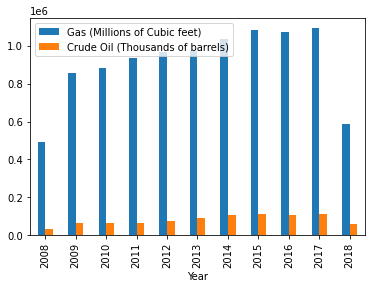

In [98]:
plot = merged_df.plot(kind="bar")
plot.set_xlabel("Year")
plot.legend(['Gas (Millions of Cubic feet)', 'Crude Oil (Thousands of barrels)'])

### Check your code

In [99]:
from nbresult import ChallengeResult

result = ChallengeResult('merged_dataframes',
    merged_df_shape=merged_df.shape,
    yearly_oil_2008=merged_df.iloc[0]["Crude Oil"],
)
result.write()

In [100]:
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.6, pytest-6.2.3, py-1.10.0, pluggy-0.13.1 -- /Users/smrack/.pyenv/versions/3.8.6/envs/lewagon/bin/python3.8
cachedir: .pytest_cache
rootdir: /Users/smrack/code/olushO/data-challenges/02-Data-Toolkit/01-Data-Analysis/02-US-Oil-and-Gas-Production
plugins: anyio-2.2.0, dash-1.20.0
collecting ... collected 2 items

tests/test_merged_dataframes.py::TestMergedDataframes::test_merged_df_has_the_right_shape PASSED [ 50%]
tests/test_merged_dataframes.py::TestMergedDataframes::test_yearly_oil_value_2008 PASSED [100%]

============================== 2 passed in 0.25s ===============================


💯 You can commit your code:

git add tests/merged_dataframes.pickle

git commit -m 'Completed merged_dataframes step'

git push origin master
